## Importação dos pacotes

In [1]:
# importar pacotes necessários
import numpy as np
import pandas as pd

In [2]:
# definir parâmetros extras
#pd.set_option('precision', 2)
pd.set_option('display.max_columns', 100)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# importar pacotes usados na seleção do modelo e na medição da precisão
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# importar os pacotes necessários para os algoritmos de regressão
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import VotingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

## Carga dos dados de entrada

In [5]:
# carregar arquivo de dados de treino
data = pd.read_csv('abalone-train.csv', index_col='id')

# mostrar tamanho
print(data.shape)

# mostrar alguns exemplos de registros
data.head()

(2784, 9)


sex  length  diameter  height  whole_weight  shucked_weight  \
id                                                                 
2758   M   0.535     0.430   0.155        0.7845          0.3285   
1384   F   0.630     0.485   0.170        1.3205          0.5945   
1131   M   0.565     0.435   0.150        0.9900          0.5795   
3726   I   0.500     0.395   0.145        0.7865          0.3320   
3445   I   0.495     0.400   0.145        0.5780          0.2545   

      viscera_weight  shell_weight  rings  
id                                         
2758          0.1690        0.2450     10  
1384          0.3450        0.3450      9  
1131          0.1825        0.2060      8  
3726          0.1815        0.2455      8  
3445          0.1305        0.1645      8

In [6]:
data_sex = pd.get_dummies(data['sex'], prefix='sex')

cols = {}
for col in data_sex.columns:
    cols[col] = col.lower()
data.rename(columns=cols, inplace=True)

data_sex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 2758 to 852
Data columns (total 3 columns):
sex_F    2784 non-null uint8
sex_I    2784 non-null uint8
sex_M    2784 non-null uint8
dtypes: uint8(3)
memory usage: 29.9 KB


In [7]:
data = data.join(data_sex)
data.drop('sex', axis=1, inplace=True)
data.head()

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
id                                                                             
2758   0.535     0.430   0.155        0.7845          0.3285          0.1690   
1384   0.630     0.485   0.170        1.3205          0.5945          0.3450   
1131   0.565     0.435   0.150        0.9900          0.5795          0.1825   
3726   0.500     0.395   0.145        0.7865          0.3320          0.1815   
3445   0.495     0.400   0.145        0.5780          0.2545          0.1305   

      shell_weight  rings  sex_F  sex_I  sex_M  
id                                              
2758        0.2450     10      0      0      1  
1384        0.3450      9      1      0      0  
1131        0.2060      8      0      0      1  
3726        0.2455      8      0      1      0  
3445        0.1645      8      0      1      0

In [8]:
# definir dados de entrada

X = data.drop(['rings'], axis=1) # tudo, exceto a coluna alvo
y = data['rings'] # apenas a coluna alvo

print('Forma dos dados originais:', X.shape, y.shape)

Forma dos dados originais: (2784, 10) (2784,)


## Treinamento dos modelos preditivos

In [9]:
from sklearn.metrics import make_scorer, mean_squared_error

def root_mean_squared_error(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5

RMSE = make_scorer(root_mean_squared_error, greater_is_better=False)

In [10]:
def evaluate_model_cv(model, X=X, y=y):
  kfold = KFold(n_splits=10, random_state=42)
  results = cross_val_score(model, X, y, cv=kfold, scoring=RMSE, verbose=1)
  score = (-1) * results.mean()
  stddev = results.std()
  print(model, '\nCross-Validation Score: %.2f (+/- %.2f)' % (score, stddev))
  return score

In [15]:
# faz o ajuste fino do modelo, calculando os melhores hiperparâmetros
def fine_tune_model(model, params, X=X, y=y):
  print('\nFine Tuning Model:')
  print(model, "\nparams:", params)

  kfold = KFold(n_splits=10, random_state=42)
  grid = GridSearchCV(estimator=model, param_grid=params, scoring=RMSE, cv=kfold, verbose=1)
  grid.fit(X, y)

  print('\nGrid Best Score: %.2f' % (grid.best_score_ * (-1)))
  print('Best Params:', grid.best_params_)
 
  return grid

## Avaliação e ajuste fino de cada modelo preditivo

In [17]:
model = LinearRegression(n_jobs=2, fit_intercept=True, normalize=True)
evaluate_model_cv(model)

params = {'fit_intercept':[True, False], 'normalize':[True, False]}
fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=True) 
Cross-Validation Score: 2.21 (+/- 0.17)

Fine Tuning Model:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=True) 
params: {'fit_intercept': [True, False], 'normalize': [True, False]}
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Grid Best Score: 2.21
Best Params: {'fit_intercept': True, 'normalize': True}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(root_mean_squared_error, greater_is_better=False),
       verbose=1)

In [21]:
model = LogisticRegression(n_jobs=2, random_state=42, multi_class='auto', C=1000, solver='newton-cg')
evaluate_model_cv(model)

params = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C':np.logspace(-3,3,7)
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [22]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=8, fit_intercept=True, normalize=True)
evaluate_model_cv(model)

params = {
    'n_nonzero_coefs': [None, 1, 2, 4, 6, 8, 10],
    'fit_intercept': [True, False],
    'normalize': [True, False]
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=8,
             normalize=True, precompute='auto', tol=None) 
Cross-Validation Score: 2.21 (+/- 0.17)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished


In [27]:
model = PassiveAggressiveRegressor(random_state=42, C=0.2, fit_intercept=True)
evaluate_model_cv(model)

params = {
    'C': [0.1, 0.2, 0.4, 0.8, 1.0],
    'fit_intercept': [True, False],
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and

PassiveAggressiveRegressor(C=0.2, average=False, early_stopping=False,
              epsilon=0.1, fit_intercept=True, loss='epsilon_insensitive',
              max_iter=None, n_iter=None, n_iter_no_change=5,
              random_state=42, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False) 
Cross-Validation Score: 2.42 (+/- 0.24)


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [31]:
model = Perceptron(random_state=42, penalty='l1', alpha=0.01, fit_intercept=True)
evaluate_model_cv(model)

#penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, 
#random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False

params = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': np.logspace(-6, -1, 6),
    'fit_intercept': [True, False]
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added 

Perceptron(alpha=0.01, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False) 
Cross-Validation Score: 3.61 (+/- 0.35)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.7s finished


In [29]:
model = RANSACRegressor(random_state=42, min_samples=0.75)
evaluate_model_cv(model)

#base_estimator=None, min_samples=None, residual_threshold=None, is_data_valid=None, is_model_valid=None, max_trials=100, 
#max_skips=inf, stop_n_inliers=inf, stop_score=inf, stop_probability=0.99, loss=’absolute_loss’, random_state=None

params = {
    'min_samples': [None, 0.1, 0.25, 0.5, 0.75, 1.0]
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=0.75, random_state=42, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf) 
Cross-Validation Score: 2.24 (+/- 0.18)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   27.0s finished


In [30]:
model = Ridge(random_state=42, alpha=0.1, fit_intercept=False, normalize=True)
evaluate_model_cv(model)

#alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None

params = {
    'alpha': np.logspace(-6, -1, 4),
    'fit_intercept': [True, False],
    'normalize': [True, False]
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=True, random_state=42, solver='auto', tol=0.001) 
Cross-Validation Score: 2.21 (+/- 0.17)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


In [32]:
model = SGDRegressor(random_state=42, alpha=1e-06, fit_intercept=False, penalty=None)
evaluate_model_cv(model)

#loss=’squared_loss’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, 
#verbose=0, epsilon=0.1, random_state=None, learning_rate=’invscaling’, eta0=0.01, power_t=0.25, early_stopping=False, 
#validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False

params = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': np.logspace(-6, -1, 4),
    'fit_intercept': [True, False]
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been ad

SGDRegressor(alpha=1e-06, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=False, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False) 
Cross-Validation Score: 2.69 (+/- 0.21)


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


In [33]:
model = TheilSenRegressor(random_state=42, n_jobs=2, fit_intercept=True)
evaluate_model_cv(model)

#fit_intercept=True, copy_X=True, max_subpopulation=10000.0, n_subsamples=None, 
#max_iter=300, tol=0.001, random_state=None, n_jobs=None, verbose=False

params = {
    'fit_intercept': [True, False]
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=2, n_subsamples=None,
         random_state=42, tol=0.001, verbose=False) 
Cross-Validation Score: 2.23 (+/- 0.17)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.0min finished


In [34]:
model = KNeighborsRegressor(n_jobs=2, n_neighbors=11, weights='distance')
evaluate_model_cv(model)

#n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None

params = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance']
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=2, n_neighbors=11, p=2,
          weights='distance') 
Cross-Validation Score: 2.24 (+/- 0.20)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.9s finished


In [35]:
model = SVR(gamma='auto', kernel='linear')
evaluate_model_cv(model)

#kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001, C=1.0, 
#epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1

params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']#, 'precomputed']
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
Cross-Validation Score: 2.34 (+/- 0.23)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.7s finished


In [36]:
model = RandomForestRegressor(random_state=42, n_jobs=2, n_estimators=100, max_depth=7)
evaluate_model_cv(model)

#n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False

params = {
    'n_estimators': [5, 10, 25, 50, 75, 100],
    'max_depth': [None, 3, 5, 7, 9, 11, 13]
}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
           oob_score=False, random_state=42, verbose=0, warm_start=False) 
Cross-Validation Score: 2.18 (+/- 0.20)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   45.1s finished


In [ ]:
# https://scikit-learn.org/stable/modules/classes.html

In [43]:
model = GradientBoostingRegressor(random_state=42)
evaluate_model_cv(model)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False) 
Cross-Validation Score: 2.22 (+/- 0.20)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.1s finished


2.2246574460647914

In [44]:
model = DecisionTreeRegressor(random_state=42)
evaluate_model_cv(model)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best') 
Cross-Validation Score: 3.11 (+/- 0.19)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


3.1109542059076007

In [45]:
model = GaussianProcessRegressor()
evaluate_model_cv(model)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None) 
Cross-Validation Score: 44.61 (+/- 51.76)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


44.609203304259225

In [46]:
model = MLPRegressor(random_state=42)
evaluate_model_cv(model)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) 
Cross-Validation Score: 2.20 (+/- 0.19)


/opt/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.5min finished


2.201780707817829

In [15]:
# A) Logistic Regression
model = LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto', max_iter=500, C=100)
#TODO: testar LogisticRegression(multi_class='multinomial', solver='newton-cg')
evaluate_model_cv(model)

params = {'solver':['liblinear', 'lbfgs'], 'C':np.logspace(-3,3,7)}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 
Cross-Validation Score: 96.48 (4.76) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.1s finished


In [16]:
# B) Decision Tree
model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=11)
evaluate_model_cv(model)

params = {'criterion':['gini','entropy'], 'max_depth':[3,5,7,11]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best') 
Cross-Validation Score: 97.29 (4.47) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [17]:
# C) K-Nearest Neighbours
model = KNeighborsClassifier(n_neighbors=1)
evaluate_model_cv(model)

params = {'n_neighbors':[1, 3, 5, 7, 9]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform') 
Cross-Validation Score: 97.19 (4.70) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [18]:
# D) Support Vector Machine (SVM)
model = SVC(random_state=42, C=10, gamma=0.1, kernel='rbf')
# SVC(kernel='linear', C=1)
evaluate_model_cv(model)

params = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['linear', 'rbf']}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False) 
Cross-Validation Score: 98.57 (2.86) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [19]:
# E) Random Forest
model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=10)
evaluate_model_cv(model)

params = {'n_estimators':[10, 50, 100, 500], 'max_features':['auto', 'sqrt', 'log2']}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False) 
Cross-Validation Score: 96.52 (4.72) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [20]:
# F) Stochastic Gradient Descent (SGD)
model = SGDClassifier(random_state=42, max_iter=100, tol=0.1)
evaluate_model_cv(model)

params = {'max_iter':[100, 200, 350, 500, 1000], 'tol':[0.1, 0.01]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.1,
       validation_fraction=0.1, verbose=0, warm_start=False) 
Cross-Validation Score: 92.33 (6.66) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [21]:
# G) Perceptron
model = Perceptron(random_state=42, max_iter=100, tol=0.01)
# Perceptron(eta0=1, random_state=1)
evaluate_model_cv(model)

params = {'max_iter':[100, 200, 350, 500, 1000], 'tol':[0.1, 0.01, 0.001]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=0.01,
      validation_fraction=0.1, verbose=0, warm_start=False) 
Cross-Validation Score: 93.67 (6.73) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [22]:
# H) Naïve Bayes
model = GaussianNB(priors=None, var_smoothing=1e-08)
evaluate_model_cv(model)

params = {'priors': [None], 'var_smoothing': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GaussianNB(priors=None, var_smoothing=1e-08) 
Cross-Validation Score: 97.19 (4.70) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [23]:
# I) Linear SVM
model = LinearSVC(random_state=42, max_iter=1000, C=10)
evaluate_model_cv(model)

params = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear faile

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0) 
Cross-Validation Score: 95.76 (5.69) %


/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [24]:
# J) Ada Boost
model = AdaBoostClassifier(DecisionTreeClassifier(random_state=42), n_estimators=5)
evaluate_model_cv(model)

params = {'n_estimators':[1,3,5,7,11]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=5, random_state=None) 
Cross-Validation Score: 95.19 (4.34) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [25]:
# K) Gradient Boosting
model = GradientBoostingClassifier(random_state=42, max_depth=3)
evaluate_model_cv(model)

'''
params = {
    "learning_rate":[0.01, 0.05, 0.1],
    "max_depth":[3, 5, 7],
    "max_features":["log2", "sqrt"],
    "criterion":["friedman_mse", "mae"],
    "subsample":[0.5, 0.75, 1.0],
}
'''

params = {'max_depth':[3, 5, 7]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False) 
Cross-Validation Score: 97.24 (4.51) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   33.5s finished


In [26]:
# M) Multi-Layer Perceptron (MLP)
model = MLPClassifier(random_state=42, solver='lbfgs', alpha=0.1, hidden_layer_sizes=(15,))
evaluate_model_cv(model)

params = {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) 
Cross-Validation Score: 97.86 (4.57) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.3s finished


In [27]:
# N) Linear Discriminant Analysis (LDA)
model = LinearDiscriminantAnalysis(solver='svd')
evaluate_model_cv(model)

params = {'solver':['svd', 'lsqr']} #, 'eigen']}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 
Cross-Validation Score: 92.33 (5.96) %


/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished


## Comparação final entre os algoritmos

In [28]:
models = []
models.append(('LR', LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto', max_iter=500, C=100)))
models.append(('DT', DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=11)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('SVM', SVC(random_state=42, C=10, gamma=0.1, kernel='rbf')))
models.append(('RF', RandomForestClassifier(random_state=42, max_features='auto', n_estimators=10)))
models.append(('SGD', SGDClassifier(random_state=42, max_iter=100, tol=0.1)))
models.append(('NN', Perceptron(random_state=42, max_iter=100, tol=0.01)))
models.append(('NB', GaussianNB(priors=None, var_smoothing=1e-08)))
models.append(('LSVM', LinearSVC(random_state=42, max_iter=1000, C=10)))
models.append(('ABDT', AdaBoostClassifier(DecisionTreeClassifier(random_state=42), n_estimators=5)))
models.append(('GB', GradientBoostingClassifier(random_state=42, max_depth=3)))
models.append(('MLP', MLPClassifier(random_state=42, solver='lbfgs', alpha=0.1, hidden_layer_sizes=(15,))))
models.append(('LDA', LinearDiscriminantAnalysis(solver='svd')))

In [29]:
results = []
names = []
scores = []
stddevs = []

for name, model in models:
  kfold = KFold(n_splits=10, random_state=42)
  cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  scores.append(cv_results.mean() * 100)
  stddevs.append(cv_results.std() * 100)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.964762 (0.047581)
DT: 0.972857 (0.044673)
KNN: 0.971905 (0.046969)
SVM: 0.985714 (0.028571)
RF: 0.965238 (0.047239)
SGD: 0.923333 (0.066648)
NN: 0.936667 (0.067312)
NB: 0.971905 (0.046969)


/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

LSVM: 0.957619 (0.056922)
ABDT: 0.965714 (0.045466)
GB: 0.972381 (0.045115)
MLP: 0.978571 (0.045737)


/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.923333 (0.059608)


/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


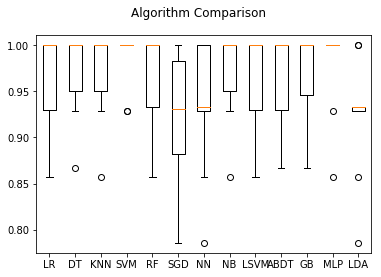

In [30]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [31]:
results = pd.DataFrame({'Model': names, 'Score': scores, 'Std Dev': stddevs})
results.sort_values(by='Score', ascending=False)

Model      Score   Std Dev
3    SVM  98.571429  2.857143
11   MLP  97.857143  4.573660
1     DT  97.285714  4.467316
10    GB  97.238095  4.511512
2    KNN  97.190476  4.696938
7     NB  97.190476  4.696938
9   ABDT  96.571429  4.546559
4     RF  96.523810  4.723896
0     LR  96.476190  4.758094
8   LSVM  95.761905  5.692219
6     NN  93.666667  6.731151
5    SGD  92.333333  6.664796
12   LDA  92.333333  5.960756